In [1]:
import pandas as pd
df=pd.read_csv('d:/data/creditcard/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [3]:
train_cols=df.columns[1:30]
X=df[train_cols]
y=df['Class']

In [5]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['Class'])
df2=pd.concat([X_samp,y_samp],axis=1)

In [6]:
df2['Class'].value_counts() #샘플링 후의 0,1 카운트

1    492
0    492
Name: Class, dtype: int64

In [7]:
#샘플링 데이터셋 X,y
X=X_samp[train_cols]
y=y_samp['Class']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)

In [12]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(random_state=100)
model.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=100, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [18]:
print('학습용:{:6.2f}%'.format(model.score(X_train,y_train)*100))
print('검증용:{:6.2f}%'.format(model.score(X_test,y_test)*100))

학습용: 97.20%
검증용: 91.88%


최적의 k: 18
최적의 정확도: 0.9390862944162437
400 300


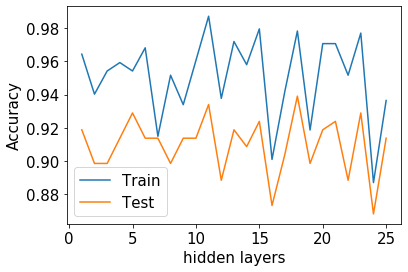

In [26]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
train_rate=[]
test_rate=[]
for i in range(100,501,100):
    for j in range(100,501,100):
        model=MLPClassifier(random_state=100,
                           hidden_layer_sizes=[i,j],max_iter=5000)
        model.fit(X_train,y_train)
        train_rate.append(model.score(X_train,y_train))
        test_rate.append(model.score(X_test,y_test))
        
plt.rcParams['font.size']=15
plt.plot(range(1,26),train_rate,label='Train')
plt.plot(range(1,26),test_rate,label='Test')
plt.ylabel('Accuracy')
plt.xlabel('hidden layers')
plt.legend()

max_rate=max(test_rate)
idx=np.where(test_rate == max_rate)[0][0]
print('최적의 k:',idx+1)
print('최적의 정확도:',max_rate)
cnt=0
for i in range(100,501,100):
    for j in range(100,501,100):
        if cnt == idx:
            print(i,j)
        cnt+=1

In [27]:
model=MLPClassifier(hidden_layer_sizes=[400,300],random_state=100)
model.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[400, 300], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=100, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [28]:
print('학습용:{:6.2f}%'.format(model.score(X_train,y_train)*100))
print('검증용:{:6.2f}%'.format(model.score(X_test,y_test)*100))

학습용: 97.84%
검증용: 93.91%
